In [1]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#              to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [2]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.
/home/sunbeam/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sunbeam/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sunbeam/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sunbeam/anaconda3/lib/python3.7/site-packages/t

In [3]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')

#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2019-12-11,271.100006,268.500000,268.809998,270.769989,19689200.0,270.128906
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,270.817261
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,274.498535


In [4]:
# Get the number of rows and columns in the data set
df.shape

(2003, 6)

/home/sunbeam/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


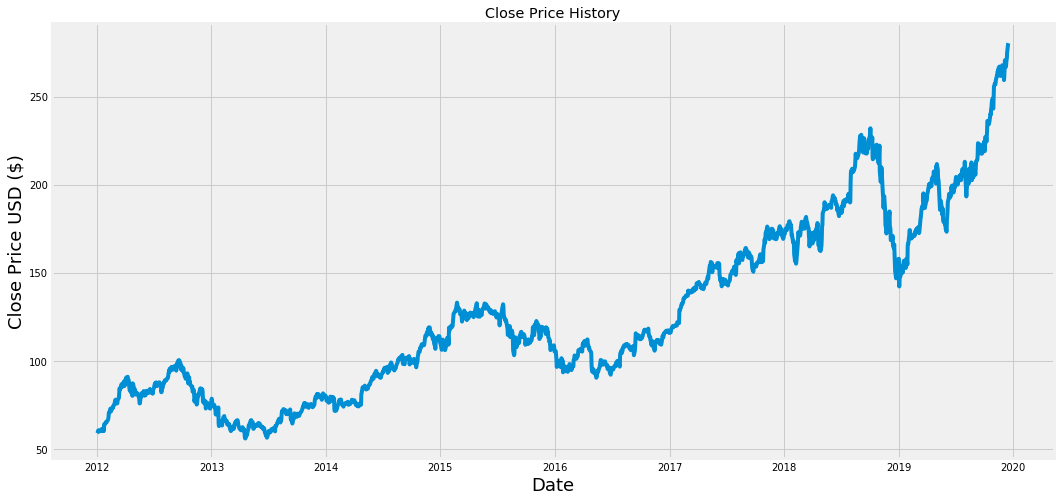

In [5]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
# We can notice a trend , apple closing stock price has been increasing over the years. 
# As per observations it seems to be a good stock to buy.
# According to graph if you have bought the stocks between 2013-2014(50$) and sold it in 2019-2020(250$) , 
# you have earned a good amount of profit. 

In [7]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
data

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143
...,...
2019-12-11,270.769989
2019-12-12,271.459991
2019-12-13,275.149994


In [8]:
# Convert the dataframe to a numpy array
dataset = data.values
dataset

array([[ 58.74714279],
       [ 59.06285858],
       [ 59.71857071],
       ...,
       [275.1499939 ],
       [279.85998535],
       [280.41000366]])

In [9]:
# Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )
training_data_len

1603

In [10]:
# it is a good practice to preprocess transformations, scaling, or normalizations to the data before it is 
# presented to neural network

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [11]:
## Create the training data set
 # Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
train_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.58926183],
       [0.58164901],
       [0.58939538]])

In [12]:
## Create the training data set
 # Split the data into x_train and y_train data sets

x_train = []
y_train = [] 

# x_train will be independent training variables/features and y_train will be dependent/target variables

In [13]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814046, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661397,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632775, 0.09835024, 0.10269405, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701233, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [18]:
# Convert the x_train and y_train to numpy arrays so that we can use them to train the lstm model  
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train)
print(y_train)

[[0.01316509 0.01457064 0.01748985 ... 0.13766105 0.14243103 0.14442805]
 [0.01457064 0.01748985 0.02026915 ... 0.14243103 0.14442805 0.13949272]
 [0.01748985 0.02026915 0.01984303 ... 0.14442805 0.13949272 0.13293563]
 ...
 [0.52177011 0.51927696 0.51669488 ... 0.5857448  0.59767603 0.5912207 ]
 [0.51927696 0.51669488 0.51322235 ... 0.59767603 0.5912207  0.58926183]
 [0.51669488 0.51322235 0.51958863 ... 0.5912207  0.58926183 0.58164901]]
[0.13949272 0.13293563 0.14507041 ... 0.58926183 0.58164901 0.58939538]


In [19]:
x_train.shape

(1543, 60)

In [20]:
# As of right now, x_train is 2D.
# LSTM network expects the input to be 3D in the form of number of samples, number of time stamps, 
#  number of features.

In [21]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

# x_train.shape[0] = 1543 => number of samples(rows)
# x_train.shape[1] = 60 => number of time stamps
# 1 => number of features('Close' column)

(1543, 60, 1)

In [22]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1))) # 50 neurons # new lstm layer added
model.add(LSTM(50, return_sequences= False)) # no new lstm layers will be added
model.add(Dense(25)) # densly connected neural network layer with 25 neurons
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Optimizer is used to improve upon the loss function
# Loss function is used to measure how well the model did on training

In [24]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)
# Batch_size is total number of training examples present in a single batch
# Epochs is number of iterations when the entire dataset is passed forward and backward through the neural network

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
1543/1543 [==============================] - 46s 30ms/step - loss: 7.6103e-04


In [26]:
## Create the testing data set
 # Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
test_data

array([[0.51322235],
       [0.51958863],
       [0.53294452],
       [0.54839284],
       [0.54581069],
       [0.54460864],
       [0.53071854],
       [0.53610544],
       [0.53882114],
       [0.53815331],
       [0.53085209],
       [0.53935536],
       [0.55288929],
       [0.56063573],
       [0.5528448 ],
       [0.5460333 ],
       [0.54696818],
       [0.54416348],
       [0.53205414],
       [0.53178703],
       [0.51411273],
       [0.50333899],
       [0.4859318 ],
       [0.52079068],
       [0.50106844],
       [0.49278779],
       [0.49857536],
       [0.49367817],
       [0.50129106],
       [0.51562638],
       [0.52092423],
       [0.50124656],
       [0.50868133],
       [0.5229276 ],
       [0.51932152],
       [0.52688985],
       [0.52951649],
       [0.53436918],
       [0.54514292],
       [0.5433621 ],
       [0.52092423],
       [0.48940432],
       [0.4872674 ],
       [0.47702787],
       [0.48018873],
       [0.48272638],
       [0.47426767],
       [0.487

In [29]:
## Create the testing data set
 # Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] 
# y_test will be all of the values that we want our model to predict, so these are the actual test values  

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
# we are going to append the past 60 values to x_test dataset   

print(x_test)
print(y_test)

[array([0.51322235, 0.51958863, 0.53294452, 0.54839284, 0.54581069,
       0.54460864, 0.53071854, 0.53610544, 0.53882114, 0.53815331,
       0.53085209, 0.53935536, 0.55288929, 0.56063573, 0.5528448 ,
       0.5460333 , 0.54696818, 0.54416348, 0.53205414, 0.53178703,
       0.51411273, 0.50333899, 0.4859318 , 0.52079068, 0.50106844,
       0.49278779, 0.49857536, 0.49367817, 0.50129106, 0.51562638,
       0.52092423, 0.50124656, 0.50868133, 0.5229276 , 0.51932152,
       0.52688985, 0.52951649, 0.53436918, 0.54514292, 0.5433621 ,
       0.52092423, 0.48940432, 0.4872674 , 0.47702787, 0.48018873,
       0.48272638, 0.47426767, 0.48735639, 0.50445198, 0.53770815,
       0.53913274, 0.57002938, 0.5759505 , 0.57991274, 0.5857448 ,
       0.59767603, 0.5912207 , 0.58926183, 0.58164901, 0.58939538]), array([0.51958863, 0.53294452, 0.54839284, 0.54581069, 0.54460864,
       0.53071854, 0.53610544, 0.53882114, 0.53815331, 0.53085209,
       0.53935536, 0.55288929, 0.56063573, 0.5528448 , 0.54

In [30]:
# Convert the data to a numpy array
x_test = np.array(x_test)
x_test

array([[0.51322235, 0.51958863, 0.53294452, ..., 0.58926183, 0.58164901,
        0.58939538],
       [0.51958863, 0.53294452, 0.54839284, ..., 0.58164901, 0.58939538,
        0.5840976 ],
       [0.53294452, 0.54839284, 0.54581069, ..., 0.58939538, 0.5840976 ,
        0.58107023],
       ...,
       [0.7353308 , 0.72095091, 0.72535838, ..., 0.94688811, 0.95708301,
        0.96015487],
       [0.72095091, 0.72535838, 0.7207283 , ..., 0.95708301, 0.96015487,
        0.97658263],
       [0.72535838, 0.7207283 , 0.7356424 , ..., 0.96015487, 0.97658263,
        0.99755134]])

In [31]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
x_test

array([[[0.51322235],
        [0.51958863],
        [0.53294452],
        ...,
        [0.58926183],
        [0.58164901],
        [0.58939538]],

       [[0.51958863],
        [0.53294452],
        [0.54839284],
        ...,
        [0.58164901],
        [0.58939538],
        [0.5840976 ]],

       [[0.53294452],
        [0.54839284],
        [0.54581069],
        ...,
        [0.58939538],
        [0.5840976 ],
        [0.58107023]],

       ...,

       [[0.7353308 ],
        [0.72095091],
        [0.72535838],
        ...,
        [0.94688811],
        [0.95708301],
        [0.96015487]],

       [[0.72095091],
        [0.72535838],
        [0.7207283 ],
        ...,
        [0.95708301],
        [0.96015487],
        [0.97658263]],

       [[0.72535838],
        [0.7207283 ],
        [0.7356424 ],
        ...,
        [0.96015487],
        [0.97658263],
        [0.99755134]]])

In [33]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) # We are unscaling the values
# We want the inverse transformed predictions data to have exact same values as the y_test dataset  
predictions

array([[188.4476 ],
       [188.52704],
       [188.37592],
       [188.33821],
       [188.27841],
       [188.39412],
       [188.53311],
       [188.72719],
       [188.81793],
       [188.79819],
       [188.64525],
       [188.94762],
       [189.61566],
       [190.5539 ],
       [191.56464],
       [192.38318],
       [192.74873],
       [192.80608],
       [192.87357],
       [192.69919],
       [192.46829],
       [191.96115],
       [191.40402],
       [190.46469],
       [189.62964],
       [188.80461],
       [188.03217],
       [187.0012 ],
       [186.34933],
       [185.90527],
       [185.81355],
       [185.82727],
       [186.18866],
       [186.16876],
       [186.21921],
       [186.65472],
       [187.55815],
       [188.48828],
       [188.94128],
       [189.58969],
       [190.25198],
       [190.76141],
       [191.20999],
       [191.41043],
       [191.69266],
       [191.89526],
       [192.06061],
       [192.38481],
       [192.98557],
       [193.52092],


In [36]:
# Get the root mean squared error (RMSE) to evaluate the model
rmse=np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

# RMSE is a good measure of how accurate the model predicts the response and is the standard deviation of 
# residuals and the lower values of RMSE indicates a better fit , and usually we would want to evaluate the 
# model with other metrics as well to really get an idea of how well our model performs

5.668203434044852

/home/sunbeam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


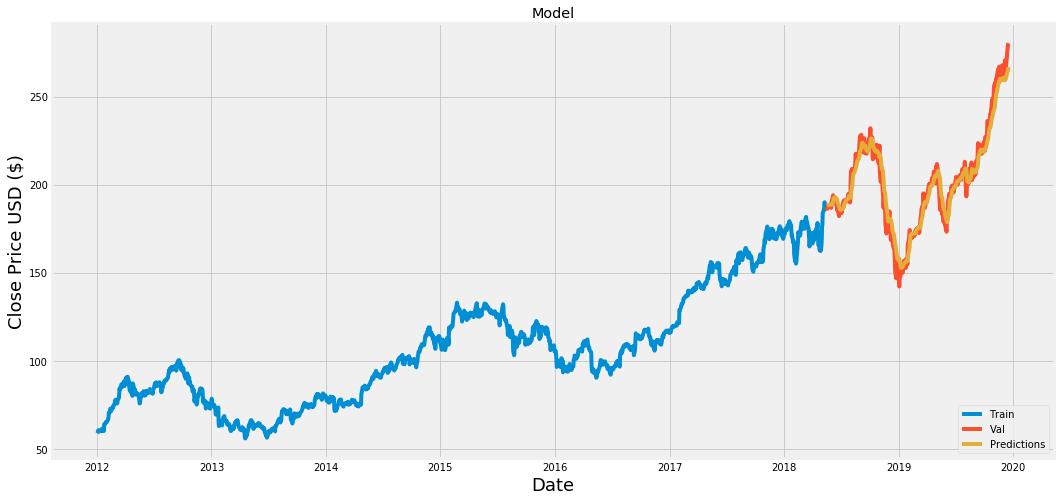

In [37]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [38]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,186.990005,188.447601
2018-05-18,186.309998,188.527039
2018-05-21,187.630005,188.375916
2018-05-22,187.160004,188.338211
2018-05-23,188.360001,188.278412
...,...,...
2019-12-11,270.769989,261.655884
2019-12-12,271.459991,262.577271
2019-12-13,275.149994,263.532227


In [39]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
apple_quote

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2019-12-11,271.100006,268.500000,268.809998,270.769989,19689200.0,270.128906
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,270.817261
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,274.498535


In [40]:
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
new_df

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143
...,...
2019-12-11,270.769989
2019-12-12,271.459991
2019-12-13,275.149994


In [41]:
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
last_60_days

array([[217.67999268],
       [221.02999878],
       [219.88999939],
       [218.82000732],
       [223.97000122],
       [224.58999634],
       [218.96000671],
       [220.82000732],
       [227.00999451],
       [227.05999756],
       [224.3999939 ],
       [227.02999878],
       [230.08999634],
       [236.21000671],
       [235.86999512],
       [235.32000732],
       [234.36999512],
       [235.27999878],
       [236.41000366],
       [240.50999451],
       [239.96000671],
       [243.17999268],
       [243.58000183],
       [246.58000183],
       [249.05000305],
       [243.28999329],
       [243.25999451],
       [248.75999451],
       [255.82000732],
       [257.5       ],
       [257.13000488],
       [257.23999023],
       [259.42999268],
       [260.14001465],
       [262.20001221],
       [261.95999146],
       [264.47000122],
       [262.64001465],
       [265.76000977],
       [267.1000061 ],
       [266.29000854],
       [263.19000244],
       [262.01000977],
       [261

In [42]:
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
last_60_days_scaled

array([[0.7207283 ],
       [0.7356424 ],
       [0.73056716],
       [0.7258036 ],
       [0.74873118],
       [0.75149138],
       [0.72642687],
       [0.73470753],
       [0.76226512],
       [0.76248773],
       [0.75064549],
       [0.76235418],
       [0.77597718],
       [0.80322324],
       [0.80170952],
       [0.79926099],
       [0.79503157],
       [0.79908288],
       [0.80411362],
       [0.82236663],
       [0.8199181 ],
       [0.83425336],
       [0.83603418],
       [0.84939007],
       [0.86038643],
       [0.83474308],
       [0.83460952],
       [0.85909532],
       [0.89052624],
       [0.89800551],
       [0.8963583 ],
       [0.89684795],
       [0.90659776],
       [0.90975875],
       [0.91892979],
       [0.91786122],
       [0.92903569],
       [0.92088866],
       [0.93477877],
       [0.94074438],
       [0.9371383 ],
       [0.92333719],
       [0.9180839 ],
       [0.9170599 ],
       [0.9374944 ],
       [0.92823437],
       [0.94403879],
       [0.941

In [43]:
#Create an empty list
X_test = []

#Append teh past 60 days
X_test.append(last_60_days_scaled)
X_test

[array([[0.7207283 ],
        [0.7356424 ],
        [0.73056716],
        [0.7258036 ],
        [0.74873118],
        [0.75149138],
        [0.72642687],
        [0.73470753],
        [0.76226512],
        [0.76248773],
        [0.75064549],
        [0.76235418],
        [0.77597718],
        [0.80322324],
        [0.80170952],
        [0.79926099],
        [0.79503157],
        [0.79908288],
        [0.80411362],
        [0.82236663],
        [0.8199181 ],
        [0.83425336],
        [0.83603418],
        [0.84939007],
        [0.86038643],
        [0.83474308],
        [0.83460952],
        [0.85909532],
        [0.89052624],
        [0.89800551],
        [0.8963583 ],
        [0.89684795],
        [0.90659776],
        [0.90975875],
        [0.91892979],
        [0.91786122],
        [0.92903569],
        [0.92088866],
        [0.93477877],
        [0.94074438],
        [0.9371383 ],
        [0.92333719],
        [0.9180839 ],
        [0.9170599 ],
        [0.9374944 ],
        [0

In [44]:
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
X_test

array([[[0.7207283 ],
        [0.7356424 ],
        [0.73056716],
        [0.7258036 ],
        [0.74873118],
        [0.75149138],
        [0.72642687],
        [0.73470753],
        [0.76226512],
        [0.76248773],
        [0.75064549],
        [0.76235418],
        [0.77597718],
        [0.80322324],
        [0.80170952],
        [0.79926099],
        [0.79503157],
        [0.79908288],
        [0.80411362],
        [0.82236663],
        [0.8199181 ],
        [0.83425336],
        [0.83603418],
        [0.84939007],
        [0.86038643],
        [0.83474308],
        [0.83460952],
        [0.85909532],
        [0.89052624],
        [0.89800551],
        [0.8963583 ],
        [0.89684795],
        [0.90659776],
        [0.90975875],
        [0.91892979],
        [0.91786122],
        [0.92903569],
        [0.92088866],
        [0.93477877],
        [0.94074438],
        [0.9371383 ],
        [0.92333719],
        [0.9180839 ],
        [0.9170599 ],
        [0.9374944 ],
        [0

In [45]:
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test

array([[[0.7207283 ],
        [0.7356424 ],
        [0.73056716],
        [0.7258036 ],
        [0.74873118],
        [0.75149138],
        [0.72642687],
        [0.73470753],
        [0.76226512],
        [0.76248773],
        [0.75064549],
        [0.76235418],
        [0.77597718],
        [0.80322324],
        [0.80170952],
        [0.79926099],
        [0.79503157],
        [0.79908288],
        [0.80411362],
        [0.82236663],
        [0.8199181 ],
        [0.83425336],
        [0.83603418],
        [0.84939007],
        [0.86038643],
        [0.83474308],
        [0.83460952],
        [0.85909532],
        [0.89052624],
        [0.89800551],
        [0.8963583 ],
        [0.89684795],
        [0.90659776],
        [0.90975875],
        [0.91892979],
        [0.91786122],
        [0.92903569],
        [0.92088866],
        [0.93477877],
        [0.94074438],
        [0.9371383 ],
        [0.92333719],
        [0.9180839 ],
        [0.9170599 ],
        [0.9374944 ],
        [0

In [46]:
#Get the predicted scaled price
pred_price = model.predict(X_test)
pred_price 

array([[0.9482501]], dtype=float32)

In [47]:
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[268.78595]]


In [48]:
# Predicted price is 268.78595 for 2019-12-18

In [50]:
# Actual price for 2019-12-18
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-17    280.410004
2019-12-18    279.739990
Name: Close, dtype: float64
